In [1]:
import pandas as pd
import numpy as np
import folium
from ipyleaflet import Map, Polyline

import matplotlib.cm as cm
import matplotlib.colors as colors

import warnings
warnings.simplefilter("ignore", UserWarning)

from features.question_1 import *
from preprocessing.helping_functions import *
from preprocessing.pre_process_stations import *
from preprocessing.pre_process_traffic import *

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
class Config:
    PATH = '../data/'

class Params:
    PARAM = 0
config = Config()
p = Params()

In [4]:
# Load the traffic data CSV file into a pandas DataFrame
df_traffic = gpd.read_file(config.PATH+'E-tmja2019-shp/TMJA2019.shp')
df_traffic

,dateRefere,route,longueur,prD,depPrD,concession,absD,cumulD,xD,yD,...,cumulF,xF,yF,zF,anneeMesur,typeCompta,typeComp_1,TMJA,ratio_PL,geometry
0,2019-01-01,31D0044,44.0,0,31,N,0.0,0.0,511656.78,6204078.36,...,44.0,511698.51,6204063.93,0.0,0,NaN,NaN,0,0.0,"LINESTRING (511656.785 6204078.361, 511672.731..."
1,2019-01-01,31D0044E,762.0,0,31,N,0.0,0.0,511367.22,6204210.06,...,762.0,511880.76,6203732.40,0.0,0,NaN,NaN,0,0.0,"MULTILINESTRING ((511367.215 6204210.064, 5113..."
2,2019-01-01,69D0301,6055.0,2,69,N,-981.0,0.0,844036.84,6510806.45,...,6055.0,849346.89,6509342.34,0.0,0,NaN,NaN,0,0.0,"LINESTRING (844036.841 6510806.450, 844044.447..."
3,2019-01-01,69D0383,13752.0,4,69,N,-494.0,0.0,846831.30,6522372.16,...,13752.0,843537.87,6512429.80,0.0,0,NaN,NaN,0,0.0,"LINESTRING (846831.303 6522372.160, 846865.124..."
4,2019-01-01,69D0383BPNL,2408.0,0,69,N,0.0,0.0,844982.46,6522772.27,...,2408.0,846831.30,6522372.16,0.0,0,NaN,NaN,0,0.0,"LINESTRING (844982.456 6522772.273, 844995.417..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,2019-01-01,N1338,2060.0,8,76,N,0.0,0.0,560104.39,6927892.82,...,2060.0,559383.28,6929517.35,0.0,0,NaN,NaN,0,0.0,"LINESTRING (560104.394 6927892.822, 560099.316..."
4691,2019-01-01,P0224,8995.0,211,31,N,-638.0,0.0,555988.61,6288880.30,...,8995.0,562812.02,6287175.90,0.0,0,NaN,NaN,0,0.0,"LINESTRING (555988.613 6288880.303, 556009.542..."
4692,2019-01-01,P0524,1777.0,31,33,N,-768.0,0.0,440252.10,6361052.92,...,1777.0,440343.36,6359374.43,0.0,0,NaN,NaN,0,0.0,"LINESTRING (440252.100 6361052.920, 440255.259..."
4693,2019-01-01,P0524,3860.0,31,33,N,1009.0,1777.0,458798.85,6325912.32,...,5637.0,458785.94,6322872.51,0.0,0,NaN,NaN,0,0.0,"LINESTRING (458798.853 6325912.317, 458797.995..."


In [5]:
#Load regional data from insee.fr
df_route = distance_road_region(config.PATH+"TCRD_076.xlsx")
df_route

,Région,Autoroutes,Routes nationales,Routes_tot
0,Auvergne-Rhône-Alpes,1698,1100,2798
1,Bourgogne-Franche-Comté,901,773,1674
2,Bretagne,50,1009,1059
3,Centre-Val de Loire,980,342,1322
4,Corse,0,0,0
5,Grand Est,1305,935,2240
6,Hauts-de-France,1179,567,1746
7,Île-de-France,620,489,1109
8,Normandie,728,570,1298
9,Nouvelle-Aquitaine,1465,1284,2749


In [6]:
df_traffic.columns

Index(['dateRefere', 'route', 'longueur', 'prD', 'depPrD', 'concession',
       'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF', 'concessi_1',
       'absF', 'cumulF', 'xF', 'yF', 'zF', 'anneeMesur', 'typeCompta',
       'typeComp_1', 'TMJA', 'ratio_PL', 'geometry'],
      dtype='object')

In [7]:
df_traffic = preprocess_data(df_traffic)
df_traffic

,dateRefere,route,longueur,prD,depPrD,concession,absD,cumulD,xD,yD,...,yF,zF,anneeMesur,typeCompta,typeComp_1,TMJA,ratio_PL,geometry,TMJA_PL,percentage_traffic
0,2019-01-01,31D0044,44.0,0,31,N,0.0,0.0,511656.78,6204078.36,...,6204063.93,0.0,0,NaN,NaN,0,0.0,"LINESTRING (511656.785 6204078.361, 511672.731...",0.0,0.0
1,2019-01-01,31D0044E,762.0,0,31,N,0.0,0.0,511367.22,6204210.06,...,6203732.40,0.0,0,NaN,NaN,0,0.0,"MULTILINESTRING ((511367.215 6204210.064, 5113...",0.0,0.0
2,2019-01-01,69D0301,6055.0,2,69,N,-981.0,0.0,844036.84,6510806.45,...,6509342.34,0.0,0,NaN,NaN,0,0.0,"LINESTRING (844036.841 6510806.450, 844044.447...",0.0,0.0
3,2019-01-01,69D0383,13752.0,4,69,N,-494.0,0.0,846831.30,6522372.16,...,6512429.80,0.0,0,NaN,NaN,0,0.0,"LINESTRING (846831.303 6522372.160, 846865.124...",0.0,0.0
4,2019-01-01,69D0383BPNL,2408.0,0,69,N,0.0,0.0,844982.46,6522772.27,...,6522372.16,0.0,0,NaN,NaN,0,0.0,"LINESTRING (844982.456 6522772.273, 844995.417...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,2019-01-01,N1338,2060.0,8,76,N,0.0,0.0,560104.39,6927892.82,...,6929517.35,0.0,0,NaN,NaN,0,0.0,"LINESTRING (560104.394 6927892.822, 560099.316...",0.0,0.0
4691,2019-01-01,P0224,8995.0,211,31,N,-638.0,0.0,555988.61,6288880.30,...,6287175.90,0.0,0,NaN,NaN,0,0.0,"LINESTRING (555988.613 6288880.303, 556009.542...",0.0,0.0
4692,2019-01-01,P0524,1777.0,31,33,N,-768.0,0.0,440252.10,6361052.92,...,6359374.43,0.0,0,NaN,NaN,0,0.0,"LINESTRING (440252.100 6361052.920, 440255.259...",0.0,0.0
4693,2019-01-01,P0524,3860.0,31,33,N,1009.0,1777.0,458798.85,6325912.32,...,6322872.51,0.0,0,NaN,NaN,0,0.0,"LINESTRING (458798.853 6325912.317, 458797.995...",0.0,0.0


In [8]:
data = add_lat_lon_columns(df_traffic)
data

,dateRefere,route,longueur,prD,depPrD,concession,absD,cumulD,xD,yD,...,typeComp_1,TMJA,ratio_PL,geometry,TMJA_PL,percentage_traffic,lonD,latD,lonF,latF
0,2019-01-01,31D0044,44.0,0,31,N,0.0,0.0,511656.78,6204078.36,...,NaN,0,0.0,"LINESTRING (511656.785 6204078.361, 511672.731...",0.0,0.0,0.695459,42.911382,0.695975,42.911263
1,2019-01-01,31D0044E,762.0,0,31,N,0.0,0.0,511367.22,6204210.06,...,NaN,0,0.0,"MULTILINESTRING ((511367.215 6204210.064, 5113...",0.0,0.0,0.691871,42.912490,0.698322,42.908331
2,2019-01-01,69D0301,6055.0,2,69,N,-981.0,0.0,844036.84,6510806.45,...,NaN,0,0.0,"LINESTRING (844036.841 6510806.450, 844044.447...",0.0,0.0,4.850575,45.681629,4.918315,45.667307
3,2019-01-01,69D0383,13752.0,4,69,N,-494.0,0.0,846831.30,6522372.16,...,NaN,0,0.0,"LINESTRING (846831.303 6522372.160, 846865.124...",0.0,0.0,4.890020,45.785151,4.844653,45.696348
4,2019-01-01,69D0383BPNL,2408.0,0,69,N,0.0,0.0,844982.46,6522772.27,...,NaN,0,0.0,"LINESTRING (844982.456 6522772.273, 844995.417...",0.0,0.0,4.866352,45.789149,4.890020,45.785151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,2019-01-01,N1338,2060.0,8,76,N,0.0,0.0,560104.39,6927892.82,...,NaN,0,0.0,"LINESTRING (560104.394 6927892.822, 560099.316...",0.0,0.0,1.071779,49.435101,1.061294,49.449539
4691,2019-01-01,P0224,8995.0,211,31,N,-638.0,0.0,555988.61,6288880.30,...,NaN,0,0.0,"LINESTRING (555988.613 6288880.303, 556009.542...",0.0,0.0,1.214224,43.684301,1.299264,43.670324
4692,2019-01-01,P0524,1777.0,31,33,N,-768.0,0.0,440252.10,6361052.92,...,NaN,0,0.0,"LINESTRING (440252.100 6361052.920, 440255.259...",0.0,0.0,-0.256575,44.300286,-0.254565,44.285224
4693,2019-01-01,P0524,3860.0,31,33,N,1009.0,1777.0,458798.85,6325912.32,...,NaN,0,0.0,"LINESTRING (458798.853 6325912.317, 458797.995...",0.0,0.0,-0.007509,43.990867,-0.006227,43.963525


In [18]:
# create a map centered on France
m = Map(center=(46.5, 2), zoom=6)

# create a polyline for each road based on its start and end coordinates
for idx, row in data.iterrows():
    # get the start and end latitude/longitude coordinates
    start_lat, start_lon = row['latD'], row['lonD']
    end_lat, end_lon = row['latF'], row['lonF']
    
    # create a polyline and add it to the map
    line = Polyline(locations=[(start_lat, start_lon), (end_lat, end_lon)], color='blue', weight=3)
    m.add_layer(line)

# display the map
m


Map(center=[46.5, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [19]:
sub_df_region = add_lat_lon_columns(sub_df_traffic)

# create a color map that goes from blue to red
color_map = cm.ScalarMappable(cmap='coolwarm').to_rgba(sub_df_region['percentage_traffic'])
# convert the color map to a list of HTML color strings
color_list = [colors.to_hex(c) for c in color_map]

sub_df_region['color_map'] = color_list
sub_df_region.head()

,dateRefere,route,longueur,prD,depPrD,concession,absD,cumulD,xD,yD,...,TMJA,ratio_PL,geometry,TMJA_PL,percentage_traffic,lonD,latD,lonF,latF,color_map
0,2019-01-01,31D0044,44.0,0,31,N,0.0,0.0,511656.78,6204078.36,...,0,0.0,"LINESTRING (511656.785 6204078.361, 511672.731...",0.0,0.0,0.695459,42.911382,0.695975,42.911263,#3b4cc0
1,2019-01-01,31D0044E,762.0,0,31,N,0.0,0.0,511367.22,6204210.06,...,0,0.0,"MULTILINESTRING ((511367.215 6204210.064, 5113...",0.0,0.0,0.691871,42.912490,0.698322,42.908331,#3b4cc0
2,2019-01-01,69D0301,6055.0,2,69,N,-981.0,0.0,844036.84,6510806.45,...,0,0.0,"LINESTRING (844036.841 6510806.450, 844044.447...",0.0,0.0,4.850575,45.681629,4.918315,45.667307,#3b4cc0
3,2019-01-01,69D0383,13752.0,4,69,N,-494.0,0.0,846831.30,6522372.16,...,0,0.0,"LINESTRING (846831.303 6522372.160, 846865.124...",0.0,0.0,4.890020,45.785151,4.844653,45.696348,#3b4cc0
4,2019-01-01,69D0383BPNL,2408.0,0,69,N,0.0,0.0,844982.46,6522772.27,...,0,0.0,"LINESTRING (844982.456 6522772.273, 844995.417...",0.0,0.0,4.866352,45.789149,4.890020,45.785151,#3b4cc0


In [20]:
# Add traffic coloring 
# create a color map that goes from blue to red
color_map = cm.ScalarMappable(cmap='coolwarm').to_rgba(sub_df_region['percentage_traffic'])
# convert the color map to a list of HTML color strings
color_list = [colors.to_hex(c) for c in color_map]


# create a map centered on France
m = Map(center=(46.5, 2), zoom=6)

# create a polyline for each road based on its start and end coordinates
for idx, row in sub_df_region.iterrows():
    # get the start and end latitude/longitude coordinates
    start_lat, start_lon = row['latD'], row['lonD']
    end_lat, end_lon = row['latF'], row['lonF']
    
    # get the percentage_traffic value for the road
    pct_traffic = row['percentage_traffic']

    # create a polyline and add it to the map
    line = Polyline(locations=[(start_lat, start_lon), (end_lat, end_lon)], color=row['color_map'], weight=3)
    m.add_layer(line)

# display the map
m


Map(center=[46.5, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

### Analyse par region

In [10]:
data_r = add_region_column(data)
data_r.head()

,dateRefere,route,longueur,prD,depPrD,concession,absD,cumulD,xD,yD,...,TMJA,ratio_PL,geometry,TMJA_PL,percentage_traffic,lonD,latD,lonF,latF,region
0,2019-01-01,31D0044,44.0,0,31,N,0.0,0.0,511656.78,6204078.36,...,0,0.0,"LINESTRING (511656.785 6204078.361, 511672.731...",0.0,0.0,0.695459,42.911382,0.695975,42.911263,Occitanie
1,2019-01-01,31D0044E,762.0,0,31,N,0.0,0.0,511367.22,6204210.06,...,0,0.0,"MULTILINESTRING ((511367.215 6204210.064, 5113...",0.0,0.0,0.691871,42.912490,0.698322,42.908331,Occitanie
2,2019-01-01,69D0301,6055.0,2,69,N,-981.0,0.0,844036.84,6510806.45,...,0,0.0,"LINESTRING (844036.841 6510806.450, 844044.447...",0.0,0.0,4.850575,45.681629,4.918315,45.667307,Auvergne-Rhône-Alpes
3,2019-01-01,69D0383,13752.0,4,69,N,-494.0,0.0,846831.30,6522372.16,...,0,0.0,"LINESTRING (846831.303 6522372.160, 846865.124...",0.0,0.0,4.890020,45.785151,4.844653,45.696348,Auvergne-Rhône-Alpes
4,2019-01-01,69D0383BPNL,2408.0,0,69,N,0.0,0.0,844982.46,6522772.27,...,0,0.0,"LINESTRING (844982.456 6522772.273, 844995.417...",0.0,0.0,4.866352,45.789149,4.890020,45.785151,Auvergne-Rhône-Alpes


In [11]:
region_data = grouped_region(data_r, config.PATH+'regions-20180101-shp/regions-20180101.shp')
region_data

,surf_km2,geometry,region,longueur (K km),Avg TMJA_PL,density_road (K km/km2)
0,12.069,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ...",Île-de-France,1236.953,3744.19,14928.79
1,31.935,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0...",Hauts-de-France,1706.436,978.50,54495.03
2,84.747,"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43...",Nouvelle-Aquitaine,2420.721,3100.75,205148.84
3,30.139,"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49...",Normandie,1239.708,2032.98,37363.56
4,32.430,"MULTIPOLYGON (((-2.55966 47.37430, -2.55941 47...",Pays de la Loire,1201.228,2483.83,38955.82
5,39.530,"POLYGON ((0.05272 47.19656, 0.05321 47.19721, ...",Centre-Val de Loire,1136.256,2628.45,44916.20
6,57.725,"POLYGON ((3.38364 48.47958, 3.38370 48.47963, ...",Grand Est,1792.295,2888.09,103460.23
7,31.840,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",Provence-Alpes-Côte d'Azur,1005.628,1463.70,32019.20
8,27.498,"MULTIPOLYGON (((-4.79551 48.41438, -4.79551 48...",Bretagne,1064.210,2792.07,29263.65
9,48.059,"POLYGON ((2.84448 47.54488, 2.84596 47.54546, ...",Bourgogne-Franche-Comté,1454.906,2446.29,69921.33


### Road Density & Traffic

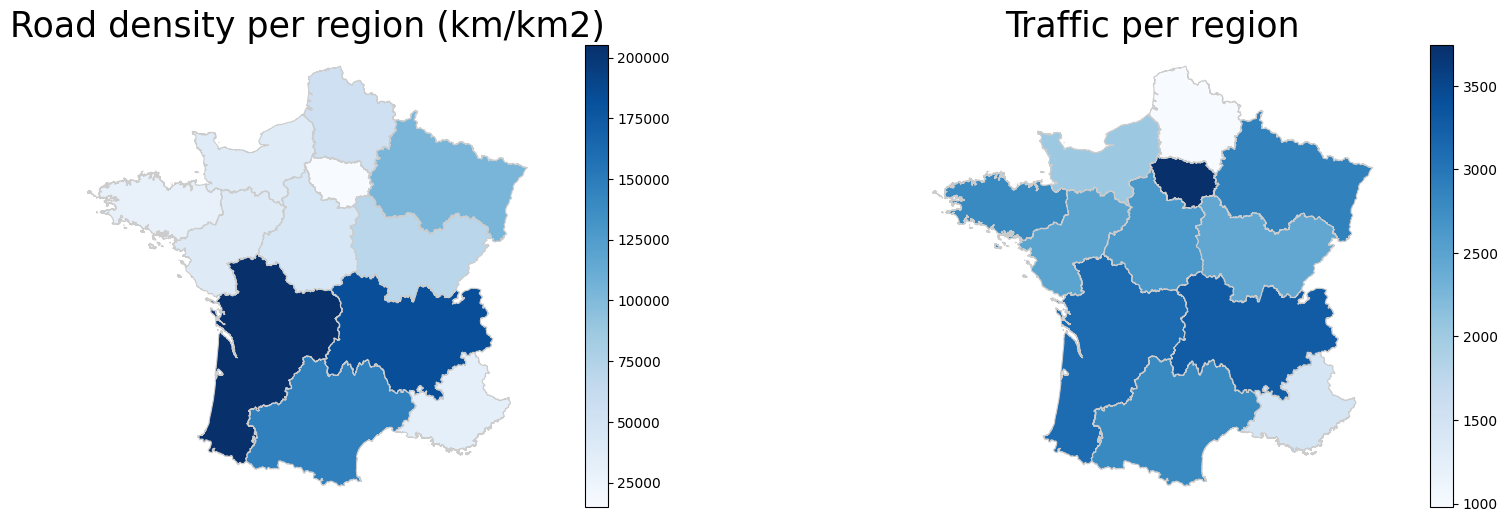

In [23]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot the road density on the left subplot
axs[0].axis('off')
axs[0].set_title('Road density per region (km/km2)', fontdict={'fontsize': '25', 'fontweight' : '3'})
region_data.plot(column='density_road (K km/km2)', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)

# Plot the traffic on the right subplot
axs[1].axis('off')
axs[1].set_title('Traffic per region', fontdict={'fontsize': '25', 'fontweight' : '3'})
region_data.plot(column='Avg TMJA_PL', cmap='Blues', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)

# Show the plot
plt.show()


## Road Total Distance per region

## Strategy

To calculate the number of trucks needed in each region for each scenario, we need to make some assumptions regarding the following factors:

- Average daily driving time for a truck driver
- Number of working days in a week
- Average truck speed
- Number of refueling stops per day
- Refueling time per stop

In [12]:
#load data 

df_route_traffic = create_part1_data(config.PATH+"TCRD_076.xlsx", region_data)
df_route_traffic

,Région,Autoroutes,Routes nationales,Routes_tot,Avg TMJA_PL,percentage_traffic
0,Auvergne-Rhône-Alpes,1698,1100,2798,3272.73,0.11
1,Bourgogne-Franche-Comté,901,773,1674,2446.29,0.08
2,Bretagne,50,1009,1059,2792.07,0.09
3,Centre-Val de Loire,980,342,1322,2628.45,0.09
4,Grand Est,1305,935,2240,2888.09,0.09
5,Hauts-de-France,1179,567,1746,978.50,0.03
6,Île-de-France,620,489,1109,3744.19,0.12
7,Normandie,728,570,1298,2032.98,0.07
8,Nouvelle-Aquitaine,1465,1284,2749,3100.75,0.10
9,Occitanie,1242,1107,2349,2791.50,0.09


In [13]:
df_route_traffic['Routes_tot'].sum()

20661

In [14]:
# Calculate the number of H2 Stations needed per region

stations = calculate_hydrogen_stations(df_route_traffic, 0.25, 0.25, 0.5, 2030)
stations = stations.sort_values(by='Hydrogen Stations Needed', ascending = False)
stations

,Region,Hydrogen Stations Needed
6,Île-de-France,45
0,Auvergne-Rhône-Alpes,41
8,Nouvelle-Aquitaine,37
2,Bretagne,34
3,Centre-Val de Loire,34
4,Grand Est,34
9,Occitanie,34
1,Bourgogne-Franche-Comté,30
10,Pays de la Loire,30
7,Normandie,26


In [15]:
stations['Hydrogen Stations Needed'].sum()

376

In [16]:
# Calculate the number of H2 Stations needed per region

stations40 = calculate_hydrogen_stations(df_route_traffic, 0.25, 0.25, 0.5, 2040)
stations40 = stations40.sort_values(by='Hydrogen Stations Needed', ascending = False)
stations40

,Region,Hydrogen Stations Needed
6,Île-de-France,267
0,Auvergne-Rhône-Alpes,245
8,Nouvelle-Aquitaine,222
2,Bretagne,200
3,Centre-Val de Loire,200
4,Grand Est,200
9,Occitanie,200
1,Bourgogne-Franche-Comté,178
10,Pays de la Loire,178
7,Normandie,156


In [29]:
stations40['Hydrogen Stations Needed'].mean()

185.33333333333334

#### Function with input parameters

In [35]:
calculate_hydrogen_stations_input(df_route_traffic, 0.25, 0.25, 0.50)

,Region,Hydrogen daily,Hydrogen Stations Needed
0,Auvergne-Rhône-Alpes,122100.0,41
1,Bourgogne-Franche-Comté,88800.0,30
2,Bretagne,99900.0,34
3,Centre-Val de Loire,99900.0,34
4,Grand Est,99900.0,34
5,Hauts-de-France,33300.0,12
6,Île-de-France,133200.0,45
7,Normandie,77700.0,26
8,Nouvelle-Aquitaine,111000.0,37
9,Occitanie,99900.0,34


## Calculate Hydrogen demand

In [36]:
df_hydrogen = calculate_hydrogen_stations_input(df_route_traffic, 0.25, 0.25, 0.5, 2030)
df_hydrogen

,Region,Hydrogen daily,Hydrogen Stations Needed
0,Auvergne-Rhône-Alpes,122100.0,41
1,Bourgogne-Franche-Comté,88800.0,30
2,Bretagne,99900.0,34
3,Centre-Val de Loire,99900.0,34
4,Grand Est,99900.0,34
5,Hauts-de-France,33300.0,12
6,Île-de-France,133200.0,45
7,Normandie,77700.0,26
8,Nouvelle-Aquitaine,111000.0,37
9,Occitanie,99900.0,34


In [37]:
daily_h = df_hydrogen['Hydrogen daily'].sum()
print(f'The daily demand in Hydogen across all regions is {daily_h/1000} Tonnes')
print(f'Yearly, the demand in Hydogen across all regions is {daily_h/1000*365} Tonnes')

The daily demand in Hydogen across all regions is 1110.0 Tonnes
Yearly, the demand in Hydogen across all regions is 405150.0 Tonnes


## Sensitivity Analysis

In [14]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
from functools import partial

In [153]:
def sensitivity_hydrogen_stations(df, daimler_perc, nikola_perc, daf_perc, year, avg_speed = 80, autonomy_daimler = 1000, 
                                  autonomy_nikola = 400, autonomy_daf = 150, tank_size_daimler = 80, tank_size_nikola = 32, 
                                  tank_size_daf = 30, capacity_stations = 3*1000):
    """
    Redefine the Calculate the number of hydrogen stations function to perform sensitivity analysis

    Args:
        df (pandas.DataFrame): The input dataframe with the traffic data for each region.
        daimler_perc (float): The percentage of Daimler trucks in the scenario (between 0 and 1).
        nikola_perc (float): The percentage of Nikola trucks in the scenario (between 0 and 1).
        daf_perc (float): The percentage of DAF trucks in the scenario (between 0 and 1).
        year (int): The year of the scenario.

    Returns:
        pandas.DataFrame: A dataframe with the region and the number of hydrogen stations needed.
    """ 
    # Assumptions and constraints
    max_drive_time_daily = 9  # hours
    break_time = 0.33 # hours

    # Determine the total number of trucks based on the scenario year
    if year == 2030:
        total_trucks = 10000
    elif year == 2040:
        total_trucks = 60000
    else:
        raise ValueError("Year must be 2030 or 2040")
    
    # Calculate the number of trucks for each brand based on the percentages
    num_daimler_trucks = int(total_trucks * daimler_perc)
    num_nikola_trucks = int(total_trucks * nikola_perc)
    num_daf_trucks = int(total_trucks * daf_perc)

    # Initialize list to store results
    results = []

    # Loop through each row in the dataframe and perform necessary calculations
    for index, row in df.iterrows():
        #calculate max daily distance
        max_daily_distance = avg_speed * max_drive_time_daily

        # Calculate the number of stops per day for each truck
        daimler_num_stops_per_day = math.ceil(max_daily_distance / autonomy_daimler)
        nikola_num_stops_per_day = math.ceil(max_daily_distance / autonomy_nikola)
        daf_num_stops_per_day = math.ceil(max_daily_distance / autonomy_daf)

        # Calculate the total time for each truck to cover the region
        total_time = row['Routes_tot'] / avg_speed

        # Calculate the working time for each truck, including breaks and recharge times
        dailmer_working_time = total_time + (daimler_num_stops_per_day * break_time)
        nikola_working_time = total_time + (nikola_num_stops_per_day * break_time)
        daf_working_time = total_time + (daf_num_stops_per_day * break_time)
    
        # Calculate the number of days each truck needs to cover the region
        dailmer_day_region = math.ceil(dailmer_working_time / max_drive_time_daily)
        nikola_day_region = math.ceil(nikola_working_time / max_drive_time_daily)
        daf_day_region = math.ceil(daf_working_time / max_drive_time_daily)
        
        # Calculate the total hydrogen consumption for each truck in each region
        hydrogen_dailmer = daimler_num_stops_per_day * tank_size_daimler * (num_daimler_trucks * row['percentage_traffic'])
        hydrogen_nikola = nikola_num_stops_per_day * tank_size_nikola * (num_nikola_trucks * row['percentage_traffic'])
        hydrogen_daf = daf_num_stops_per_day * tank_size_daf * (num_daf_trucks * row['percentage_traffic'])

        #total hydrogen needed daily
        total_hydrogen = hydrogen_dailmer + hydrogen_nikola + hydrogen_daf

        #stations needed
        stations = total_hydrogen / capacity_stations

        # Append region and number of hydrogen stations to results list
        results.append({'Region': row['Région'], 'Hydrogen Stations Needed': math.ceil(stations)})
        
        
    # Create dataframe from results list and return it
    results_df = pd.DataFrame(results)
    results = results_df['Hydrogen Stations Needed'].mean()

    return results
    



In [173]:
import numpy as np
from SALib.sample.morris import sample
from SALib.analyze.morris import analyze
from SALib.util import read_param_file

# Define the input parameters and their ranges
problem = {
    'num_vars': 10,
    'names': ['daimler_perc', 'nikola_perc', 'daf_perc', 'autonomy_daimler', 'autonomy_nikola', 'autonomy_daf', 'tank_size_daimler', 
              'tank_size_nikola', 'tank_size_daf', 'capacity_stations'],
    'bounds': [[0.1, 1], [0.1, 1], [0.1, 1], [500, 2000], [100, 1000], [100, 1000], [40, 150], [20, 100], [20, 100], [1000, 5000]]
}

avg_speed = 80

# Generate the Morris samples
param_values = sample(problem, N=1000, num_levels=4, optimal_trajectories=None, 
                      local_optimization=False, seed=None)

# Run the function for each parameter combination
Y = []
for i in range(param_values.shape[0]):
    daimler_perc, nikola_perc, daf_perc, autonomy_daimler, autonomy_nikola, autonomy_daf, tank_size_daimler, tank_size_nikola, tank_size_daf, capacity_stations = param_values[i]
    results_df = sensitivity_hydrogen_stations(df_route_traffic, daimler_perc, nikola_perc, daf_perc, 2030, avg_speed, autonomy_daimler, 
                                                autonomy_nikola, autonomy_daf, tank_size_daimler, tank_size_nikola, 
                                                tank_size_daf, capacity_stations)
    #if results_df.shape[0] != 1:
        #raise ValueError("Results dataframe has more than one row")
    
    Y.append(results_df)

# Analyze the Morris results
# Convert Y to float data type
Y = np.array(Y).astype(float)
    
morris_results = analyze(problem, param_values, Y, conf_level=0.95, print_to_console=False)
print(morris_results['mu_star']) # Print the sensitivity indices


[42.932875 68.8475 72.437875 16.74125 71.274125 74.128125 32.29625
 59.710625 59.07775 169.077375]


In [122]:
Y.mean()

112.8090606060606

'mu_star' sensitivity index values that were calculated by the Morris method represent a normalized sensitivity index that ranges from 0 to 1, where 0 indicates no effect of the input variable on the output and 1 indicates a linear effect of the input variable on the output.

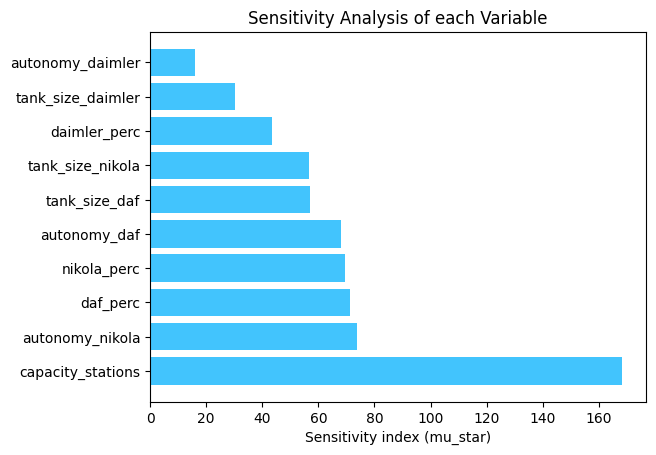

In [167]:
# Create a dictionary that maps each parameter name to its sensitivity index
sensitivity_dict = {problem['names'][i]: morris_results['mu_star'][i] for i in range(problem['num_vars'])}

# Sort the dictionary in descending order of sensitivity index
sorted_sensitivity_dict = dict(sorted(sensitivity_dict.items(), key=lambda item: item[1], reverse=True))

# Create a horizontal bar plot for each parameter showing the sensitivity index
plt.barh(list(sorted_sensitivity_dict.keys()), list(sorted_sensitivity_dict.values()), color='#42c4fd')
plt.xlabel('Sensitivity index (mu_star)')
plt.title("Sensitivity Analysis of each Variable")
plt.show()


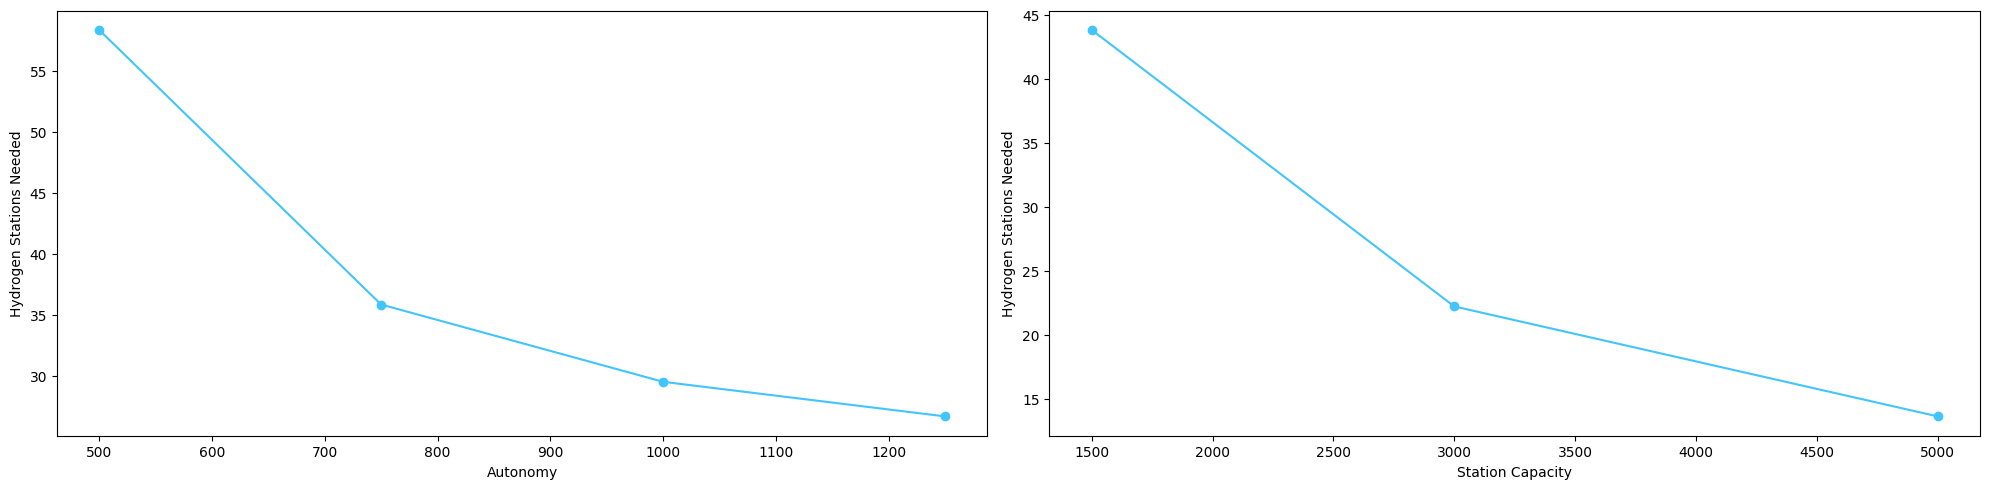

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product


# Define the scenario parameters
daimler_perc = 0.4
nikola_perc = 0.3
daf_perc = 0.3
year = 2030

# Perform sensitivity analysis
factors = {
    'Autonomy': [500, 750, 1000, 1250],
    'Station Capacity': [1500, 3000, 5000]
}

results = {}
for factor_name, factor_values in factors.items():
    factor_results = []
    for factor_value in factor_values:
        if factor_name == 'Autonomy':
            autonomy_daimler = factor_value
            autonomy_nikola = factor_value * 0.4
            autonomy_daf = factor_value * 0.2
        elif factor_name == 'Station Capacity':
            capacity_stations = factor_value
        elif factor_name == 'Number of Trucks':
            total_trucks = factor_value
        else:
            raise ValueError(f"Invalid factor name: {factor_name}")
        df_results = sensitivity_hydrogen_stations(df_route_traffic, daimler_perc, nikola_perc, daf_perc, 2030, avg_speed = 80, 
                                                   autonomy_daimler=autonomy_daimler, autonomy_nikola=autonomy_nikola, autonomy_daf=autonomy_daf, 
                                                   tank_size_daimler = 80, tank_size_nikola = 32, tank_size_daf = 30, capacity_stations=capacity_stations)
        factor_results.append(df_results)
    results[factor_name] = factor_results


# Plot the results
fig, axs = plt.subplots(nrows=1, ncols=len(factors), figsize=(20,5))
for i, (factor_name, factor_values) in enumerate(factors.items()):
    axs[i].plot(factor_values, results[factor_name], '-o',  color='#42c4fd')
    axs[i].set_xlabel(factor_name)
    axs[i].set_ylabel('Hydrogen Stations Needed')
plt.tight_layout()
plt.show()


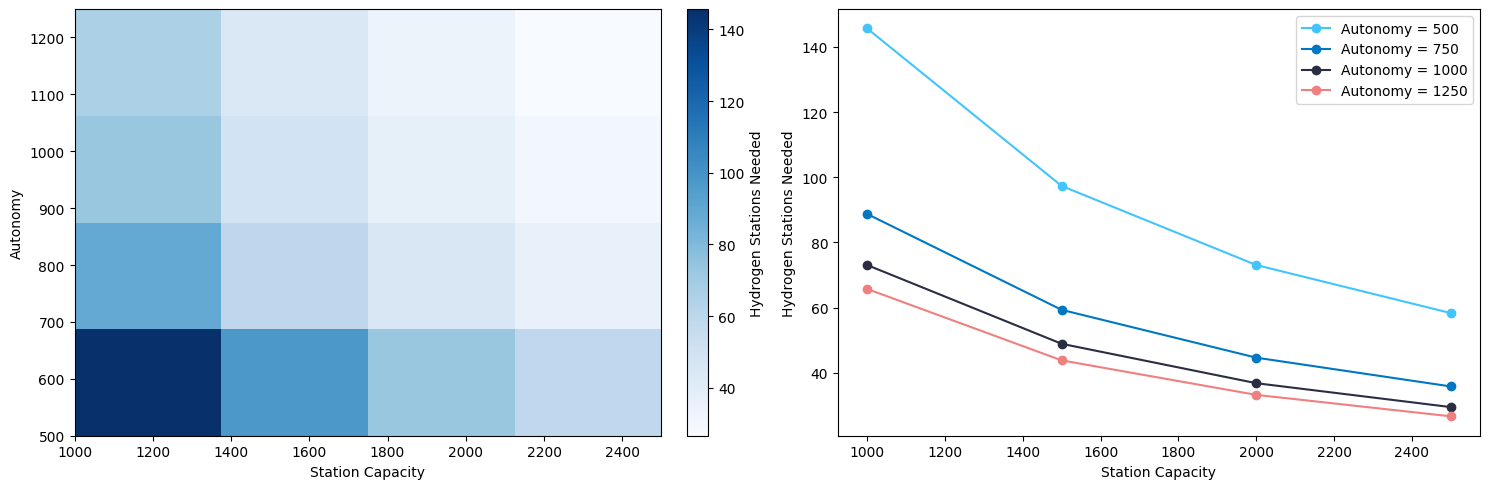

In [172]:
# Define the scenario parameters
daimler_perc = 0.4
nikola_perc = 0.3
daf_perc = 0.3
year = 2030

# Perform sensitivity analysis
autonomy_values = [500, 750, 1000, 1250]
capacity_values = [1000, 1500, 2000, 2500]
results = np.zeros((len(autonomy_values), len(capacity_values)))
for i, j in product(range(len(autonomy_values)), range(len(capacity_values))):
    autonomy_daimler = autonomy_values[i]
    autonomy_nikola = autonomy_values[i] * 0.4
    autonomy_daf = autonomy_values[i] * 0.2
    capacity_stations = capacity_values[j]
    total_trucks = 10000
    df_results = sensitivity_hydrogen_stations(df_route_traffic, daimler_perc, nikola_perc, daf_perc, 2030, avg_speed = 80, 
                                                   autonomy_daimler=autonomy_daimler, autonomy_nikola=autonomy_nikola, autonomy_daf=autonomy_daf, 
                                                   tank_size_daimler = 80, tank_size_nikola = 32, tank_size_daf = 30, capacity_stations=capacity_stations)
    results[i,j] = df_results

# Plot the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

im = axs[0].imshow(results, cmap='Blues', extent=[min(capacity_values), max(capacity_values), min(autonomy_values), max(autonomy_values)], aspect='auto', origin='lower')
axs[0].set_xlabel('Station Capacity')
axs[0].set_ylabel('Autonomy')
cbar = fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)
cbar.set_label('Hydrogen Stations Needed')

autonomy_range = np.linspace(min(autonomy_values), max(autonomy_values), len(autonomy_values))
capacity_range = np.linspace(min(capacity_values), max(capacity_values), len(capacity_values))

colors = ['#42c4fd', '#0077c2', '#2b2d42', '#f08080']
for i, autonomy_value in enumerate(autonomy_values):
    axs[1].plot(capacity_range, results[i,:], '-o', color=colors[i], label=f'Autonomy = {autonomy_value}')
axs[1].set_xlabel('Station Capacity')
axs[1].set_ylabel('Hydrogen Stations Needed')
axs[1].legend()


plt.tight_layout()
plt.show()
